# VGG-16 Model


In [1]:
import tensorflow as tf

2025-05-25 05:13:45.752100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748150025.989637      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748150026.060876      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print(tf. __version__)

2.18.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.metrics import classification_report,  confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [50]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
model0=Sequential()
model0.add(conv_base)
model0.add(Flatten())
model0.add(Dense(224,activation='relu'))
model0.add(Dense(4,activation='softmax'))

In [52]:
conv_base.trainable= False

In [53]:
model0.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 224)                 │       5,619,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,335,524 (77.57 MB)

 Trainable params: 5,620,836 (21.44 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [54]:
# Generators
def generators():
  train_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Training',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(224, 224),
  )
  validation_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Testing',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(224, 224),
  )
  return train_ds,validation_ds

In [59]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [60]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)     
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


In [61]:
cp0 = ModelCheckpoint(
    "model0.keras",  
    monitor="val_accuracy",  
    save_best_only=True,  
    mode="max",  
    verbose=1  # Print messages when saving
)

In [62]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model0.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
history=model0.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp0])

Epoch 1/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.8274 - loss: 5.9902
Epoch 1: val_accuracy improved from -inf to 0.91641, saving model to model0.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 140s 318ms/step - accuracy: 0.8276 - loss: 5.9786 - val_accuracy: 0.9164 - val_loss: 0.3034
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9757 - loss: 0.0850
Epoch 2: val_accuracy improved from 0.91641 to 0.94676, saving model to model0.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.9757 - loss: 0.0850 - val_accuracy: 0.9468 - val_loss: 0.2481
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9916 - loss: 0.0273
Epoch 3: val_accuracy did not improve from 0.94676
390/390 ━━━━━━━━━━━━━━━━━━━━ 105s 270ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9381 - val_loss: 0.2963
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9875 - loss: 0.0380
Epoch 4: val_accuracy did not improve from 0.94676
390/390 ━━━━━━━━

              precision    recall  f1-score   support

      Glioma       0.98      0.96      0.97      1000
  Meningioma       0.94      0.97      0.95      1039
    No Tumor       0.97      1.00      0.99      1078
   Pituitary       0.98      0.94      0.96      1034

    accuracy                           0.97      4151
   macro avg       0.97      0.97      0.97      4151
weighted avg       0.97      0.97      0.97      4151



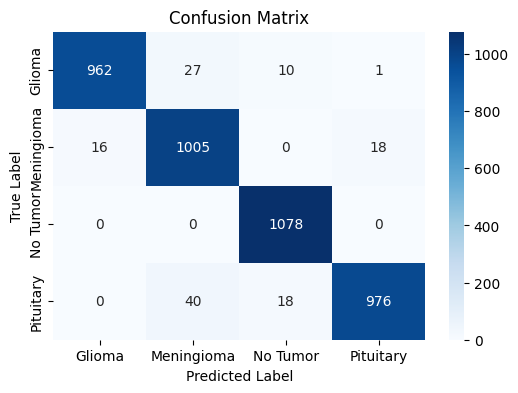

In [66]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model0.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

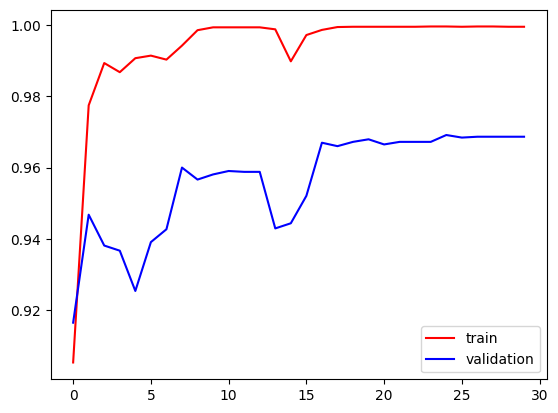

In [64]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


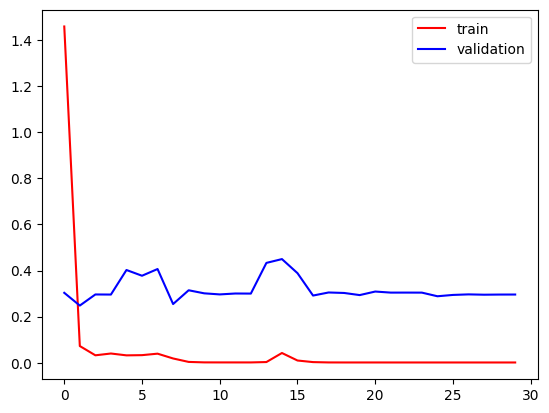

In [65]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# VGG-19 Model

In [67]:
conv_base=VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
model1=Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(224,activation='relu'))
model1.add(Dense(4,activation='softmax'))

In [69]:
conv_base.trainable= False

In [70]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 224)                 │       5,619,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,645,220 (97.83 MB)

 Trainable params: 5,620,836 (21.44 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [71]:
cp1 = ModelCheckpoint(
    "model1.keras",  
    monitor="val_accuracy",  
    save_best_only=True,  
    mode="max",  
    verbose=1 
)

In [72]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [73]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)     
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)

In [74]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [75]:
history=model1.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp1])

Epoch 1/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.8073 - loss: 4.4745
Epoch 1: val_accuracy improved from -inf to 0.91881, saving model to model1.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 143s 357ms/step - accuracy: 0.8075 - loss: 4.4664 - val_accuracy: 0.9188 - val_loss: 0.3507
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9614 - loss: 0.1319
Epoch 2: val_accuracy did not improve from 0.91881
390/390 ━━━━━━━━━━━━━━━━━━━━ 136s 349ms/step - accuracy: 0.9615 - loss: 0.1318 - val_accuracy: 0.9092 - val_loss: 0.3956
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9837 - loss: 0.0611
Epoch 3: val_accuracy improved from 0.91881 to 0.94507, saving model to model1.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 137s 351ms/step - accuracy: 0.9837 - loss: 0.0611 - val_accuracy: 0.9451 - val_loss: 0.3161
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9916 - loss: 0.0307
Epoch 4: val_accuracy improved from 0.94507 to 0.94628, saving mode

              precision    recall  f1-score   support

      Glioma       0.98      0.96      0.97      1000
  Meningioma       0.94      0.95      0.95      1039
    No Tumor       0.97      1.00      0.98      1078
   Pituitary       0.97      0.95      0.96      1034

    accuracy                           0.97      4151
   macro avg       0.97      0.97      0.97      4151
weighted avg       0.97      0.97      0.97      4151



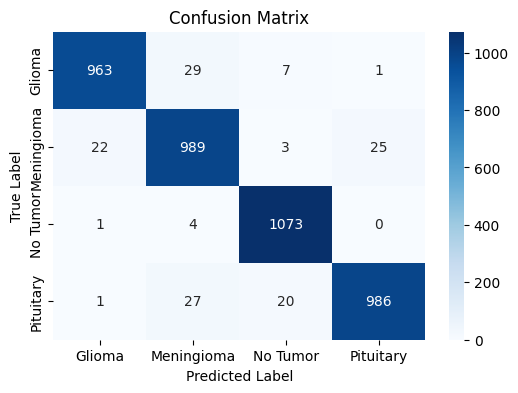

In [76]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model1.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

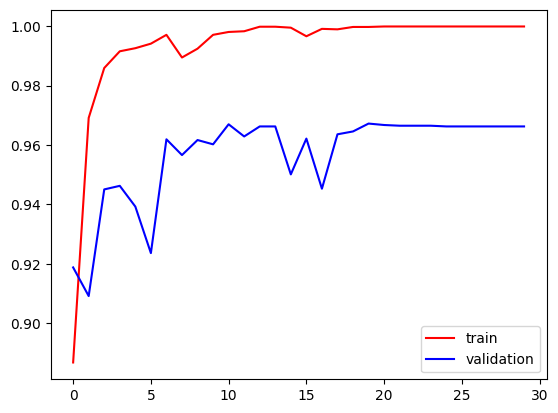

In [78]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


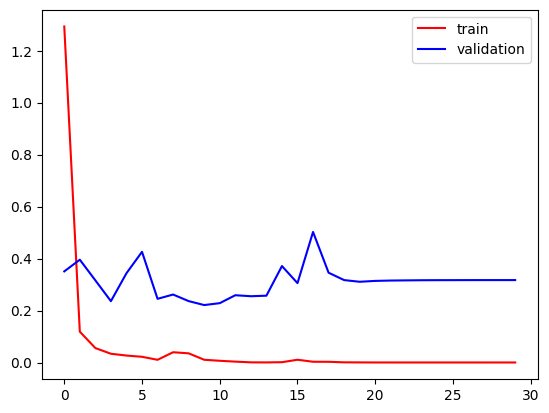

In [79]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# VGG-19 with dropout

In [17]:
conv_base=VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
model2 = Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dropout(0.3)) 
model2.add(Dense(224, activation='relu'))
model2.add(Dense(4, activation='softmax'))


In [19]:
conv_base.trainable= False

In [20]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │       5,619,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,645,220 (97.83 MB)

 Trainable params: 5,620,836 (21.44 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [21]:
cp2 = ModelCheckpoint(
    "model2.keras", 
    monitor="val_accuracy",  
    save_best_only=True,  
    mode="max",  
    verbose=1  
)

In [22]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [24]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)    
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


In [25]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
history=model2.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp2])

Epoch 1/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8275 - loss: 4.8530
Epoch 1: val_accuracy improved from -inf to 0.89737, saving model to model2.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 131s 301ms/step - accuracy: 0.8276 - loss: 4.8453 - val_accuracy: 0.8974 - val_loss: 0.3414
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9650 - loss: 0.1153
Epoch 2: val_accuracy improved from 0.89737 to 0.92050, saving model to model2.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 105s 270ms/step - accuracy: 0.9650 - loss: 0.1154 - val_accuracy: 0.9205 - val_loss: 0.2469
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9757 - loss: 0.0797
Epoch 3: val_accuracy did not improve from 0.92050
390/390 ━━━━━━━━━━━━━━━━━━━━ 105s 269ms/step - accuracy: 0.9757 - loss: 0.0798 - val_accuracy: 0.8873 - val_loss: 0.3421
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9728 - loss: 0.0810
Epoch 4: val_accuracy did not improve from 0.92050
390/390 ━━━━━━━━

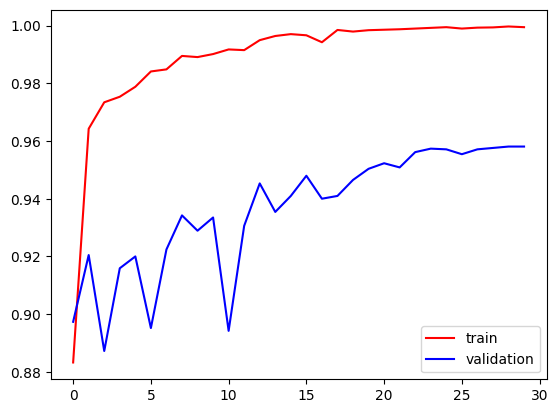

In [27]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


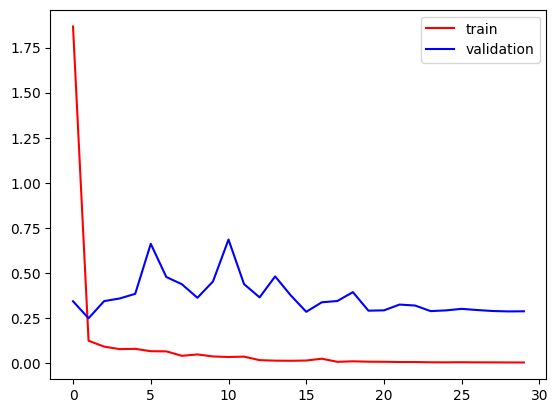

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

              precision    recall  f1-score   support

      Glioma       0.98      0.94      0.96      1000
  Meningioma       0.94      0.94      0.94      1039
    No Tumor       0.95      1.00      0.97      1078
   Pituitary       0.96      0.96      0.96      1034

    accuracy                           0.96      4151
   macro avg       0.96      0.96      0.96      4151
weighted avg       0.96      0.96      0.96      4151



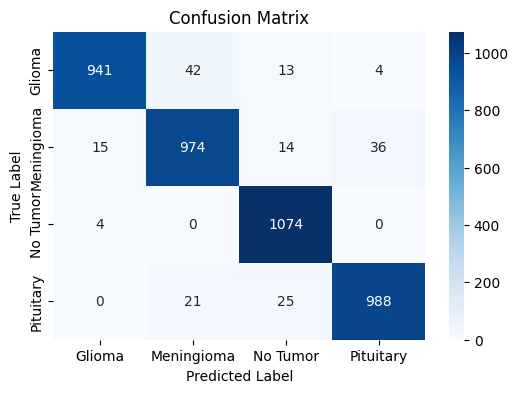

In [29]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model2.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ResNet-50 

In [18]:
conv_base=ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
model3=Sequential()
model3.add(conv_base)
model3.add(Flatten())
model3.add(Dense(224,activation='relu'))
model3.add(Dense(4,activation='softmax'))

In [30]:
conv_base.trainable=False

In [31]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 224)                 │      22,479,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,067,684 (175.73 MB)

 Trainable params: 22,479,972 (85.75 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [32]:
cp3 = ModelCheckpoint(
    "model3.keras",  
    monitor="val_accuracy", 
    save_best_only=True,  
    mode="max", 
    verbose=1 
)

In [33]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [35]:
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
def preprocess(image, label):
    image = preprocess_input(tf.cast(image, tf.float32)) 
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


In [37]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
history=model3.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp3])

Epoch 1/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8070 - loss: 6.6800
Epoch 1: val_accuracy improved from -inf to 0.66056, saving model to model3.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - accuracy: 0.8072 - loss: 6.6674 - val_accuracy: 0.6606 - val_loss: 1.2210
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9766 - loss: 0.0789
Epoch 2: val_accuracy improved from 0.66056 to 0.75669, saving model to model3.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.9766 - loss: 0.0789 - val_accuracy: 0.7567 - val_loss: 1.0134
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9838 - loss: 0.0477
Epoch 3: val_accuracy did not improve from 0.75669
390/390 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.9838 - loss: 0.0477 - val_accuracy: 0.7258 - val_loss: 1.2673
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9833 - loss: 0.0472
Epoch 4: val_accuracy improved from 0.75669 to 0.76199, saving model to m

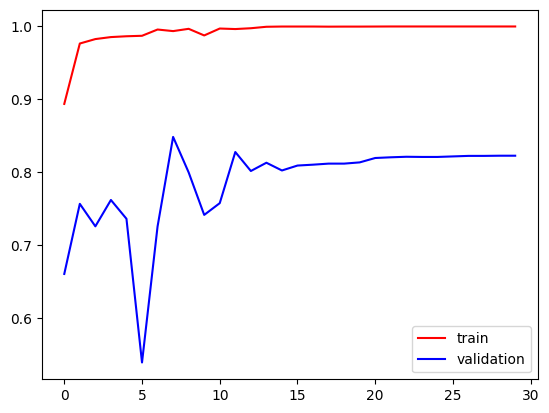

In [40]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

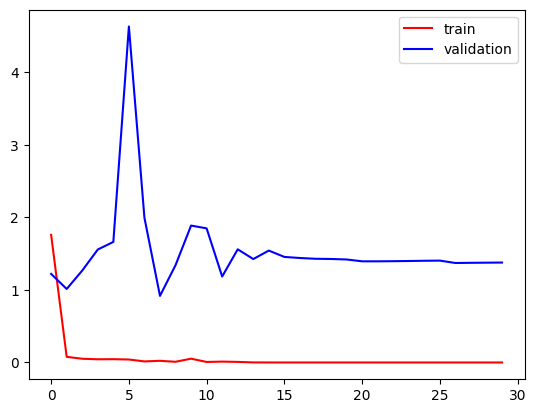

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# ResNet-50 Model with dropout

In [5]:
conv_base=ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

I0000 00:00:1748091375.148406      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748091375.149250      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
model4=Sequential()
model4.add(conv_base)
model4.add(Flatten())
model4.add(Dropout(0.3))
model4.add(Dense(224,activation='relu'))
model4.add(Dense(4,activation='softmax'))

In [7]:
conv_base.trainable=False

In [8]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │      22,479,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,067,684 (175.73 MB)

 Trainable params: 22,479,972 (85.75 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
cp4 = ModelCheckpoint(
    "model4.keras",  
    monitor="val_accuracy", 
    save_best_only=True,  
    mode="max", 
    verbose=1 
)

In [10]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
def preprocess(image, label):
    image = preprocess_input(tf.cast(image, tf.float32)) 
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)


In [12]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history=model4.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp4])

Epoch 1/30


I0000 00:00:1748091432.564383      96 service.cc:148] XLA service 0x7d9e4404d4a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748091432.565197      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748091432.565226      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748091434.200902      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/390 ━━━━━━━━━━━━━━━━━━━━ 1:53:47 18s/step - accuracy: 0.3750 - loss: 2.8973

I0000 00:00:1748091439.425481      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8231 - loss: 5.6588
Epoch 1: val_accuracy improved from -inf to 0.89015, saving model to model4.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 73s 143ms/step - accuracy: 0.8233 - loss: 5.6483 - val_accuracy: 0.8901 - val_loss: 0.4074
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9763 - loss: 0.0729
Epoch 2: val_accuracy improved from 0.89015 to 0.92363, saving model to model4.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.9763 - loss: 0.0729 - val_accuracy: 0.9236 - val_loss: 0.2531
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9867 - loss: 0.0378
Epoch 3: val_accuracy improved from 0.92363 to 0.93592, saving model to model4.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.9867 - loss: 0.0378 - val_accuracy: 0.9359 - val_loss: 0.2570
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9889 - loss: 0.0333
Epoch 4: val_accuracy improved from 0.93592 to 0.93

              precision    recall  f1-score   support

      Glioma       0.98      0.97      0.97      1000
  Meningioma       0.94      0.93      0.94      1039
    No Tumor       0.98      1.00      0.99      1078
   Pituitary       0.96      0.95      0.95      1034

    accuracy                           0.96      4151
   macro avg       0.96      0.96      0.96      4151
weighted avg       0.96      0.96      0.96      4151



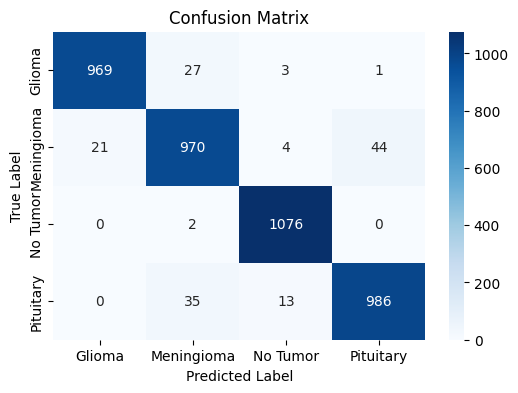

In [16]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model4.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
    

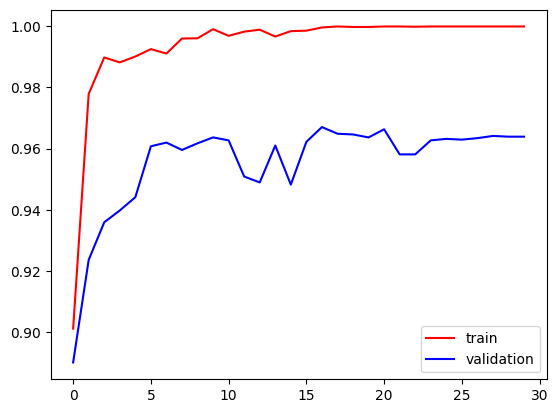

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


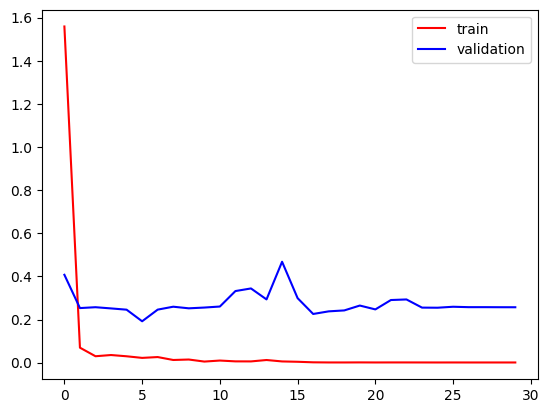

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Inception-v3

In [5]:
conv_base=InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299,299,3)
)

I0000 00:00:1748150066.843505      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748150066.844291      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model5=Sequential()
model5.add(conv_base)
model5.add(Flatten())
model5.add(Dense(224,activation='relu'))
model5.add(Dense(4,activation='softmax'))

In [7]:
conv_base.trainable = False

In [8]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │      29,360,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,164,036 (195.18 MB)

 Trainable params: 29,361,252 (112.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# Generators
def generators():
  train_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Training',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  validation_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Testing',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  return train_ds,validation_ds

In [13]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [14]:
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

def preprocess_inception(image, label):
    image = inception_preprocess(tf.cast(image, tf.float32))
    return image, label

train_ds = train_ds.map(preprocess_inception)
validation_ds = validation_ds.map(preprocess_inception)


In [15]:
cp5 = ModelCheckpoint(
    "model5.keras",  
    monitor="val_accuracy", 
    save_best_only=True,  
    mode="max",  
    verbose=1  
)

In [16]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
history=model5.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp5])

Epoch 1/30


I0000 00:00:1748150206.258396      96 service.cc:148] XLA service 0x799180015930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748150206.259114      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748150206.259140      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748150208.511833      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/390 ━━━━━━━━━━━━━━━━━━━━ 2:37:01 24s/step - accuracy: 0.3125 - loss: 2.0258

I0000 00:00:1748150218.822721      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8078 - loss: 5.4516
Epoch 1: val_accuracy improved from -inf to 0.90653, saving model to model5.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 108s 214ms/step - accuracy: 0.8080 - loss: 5.4412 - val_accuracy: 0.9065 - val_loss: 0.3236
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9663 - loss: 0.0973
Epoch 2: val_accuracy did not improve from 0.90653
390/390 ━━━━━━━━━━━━━━━━━━━━ 66s 170ms/step - accuracy: 0.9664 - loss: 0.0973 - val_accuracy: 0.9007 - val_loss: 0.3950
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9791 - loss: 0.0561
Epoch 3: val_accuracy improved from 0.90653 to 0.93086, saving model to model5.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 68s 175ms/step - accuracy: 0.9792 - loss: 0.0561 - val_accuracy: 0.9309 - val_loss: 0.2584
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9847 - loss: 0.0394
Epoch 4: val_accuracy did not improve from 0.93086
390/390 ━━━━━━━━━━━━━━━━━━━━ 

              precision    recall  f1-score   support

      Glioma       0.98      0.95      0.97      1000
  Meningioma       0.94      0.93      0.94      1039
    No Tumor       0.98      1.00      0.99      1078
   Pituitary       0.96      0.96      0.96      1034

    accuracy                           0.96      4151
   macro avg       0.96      0.96      0.96      4151
weighted avg       0.96      0.96      0.96      4151



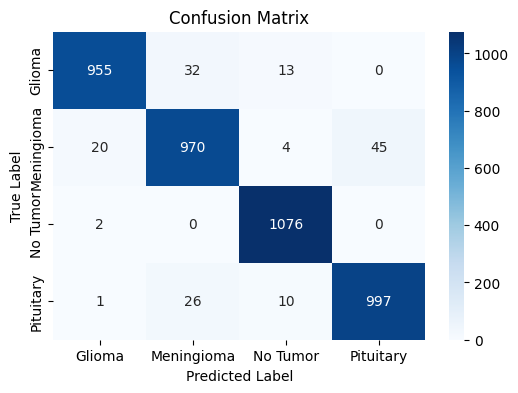

In [20]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model5.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
    

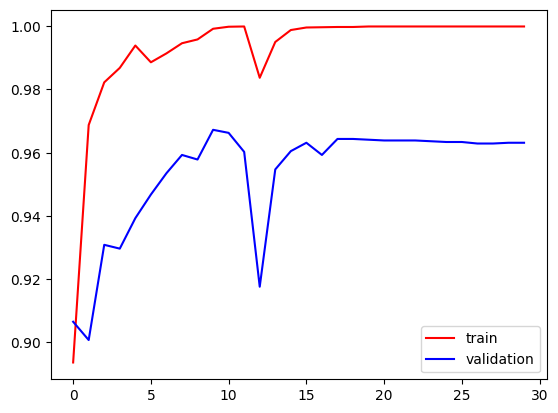

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


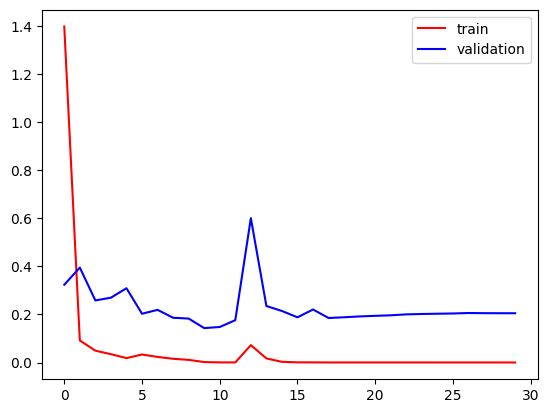

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Inception-v3 Model with dropout

In [22]:
conv_base=InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299,299,3)
)

In [23]:
model6=Sequential()
model6.add(conv_base)
model6.add(Flatten())
model6.add(Dropout(0.3))
model6.add(Dense(224,activation='relu'))
model6.add(Dense(4,activation='softmax'))

In [24]:
conv_base.trainable = False

In [25]:
model6.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 224)                 │      29,360,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,164,036 (195.18 MB)

 Trainable params: 29,361,252 (112.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [26]:
# Generators
def generators():
  train_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Training',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  validation_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Testing',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  return train_ds,validation_ds

In [27]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [28]:
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

def preprocess_inception(image, label):
    image = inception_preprocess(tf.cast(image, tf.float32))
    return image, label

train_ds = train_ds.map(preprocess_inception)
validation_ds = validation_ds.map(preprocess_inception)


In [29]:
cp6 = ModelCheckpoint(
    "model6.keras",  
    monitor="val_accuracy", 
    save_best_only=True,  
    mode="max",  
    verbose=1  
)

In [30]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
history=model6.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp6])

Epoch 1/30
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8076 - loss: 5.0087
Epoch 1: val_accuracy improved from -inf to 0.82872, saving model to model6.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 100s 214ms/step - accuracy: 0.8078 - loss: 4.9999 - val_accuracy: 0.8287 - val_loss: 0.8588
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9589 - loss: 0.1825
Epoch 2: val_accuracy improved from 0.82872 to 0.93881, saving model to model6.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 70s 179ms/step - accuracy: 0.9590 - loss: 0.1823 - val_accuracy: 0.9388 - val_loss: 0.2432
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9814 - loss: 0.0567
Epoch 3: val_accuracy improved from 0.93881 to 0.95086, saving model to model6.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 176ms/step - accuracy: 0.9814 - loss: 0.0568 - val_accuracy: 0.9509 - val_loss: 0.2322
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9898 - loss: 0.0303
Epoch 4: val_accuracy did not impro

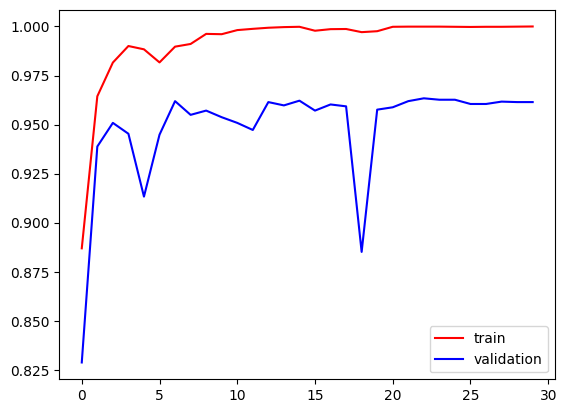

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


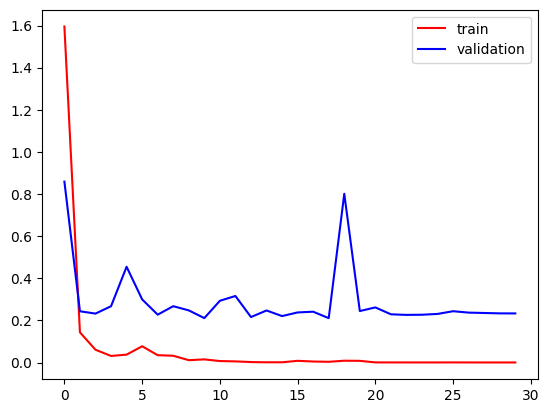

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

              precision    recall  f1-score   support

      Glioma       0.98      0.94      0.96      1000
  Meningioma       0.93      0.94      0.94      1039
    No Tumor       0.97      1.00      0.98      1078
   Pituitary       0.97      0.96      0.97      1034

    accuracy                           0.96      4151
   macro avg       0.96      0.96      0.96      4151
weighted avg       0.96      0.96      0.96      4151



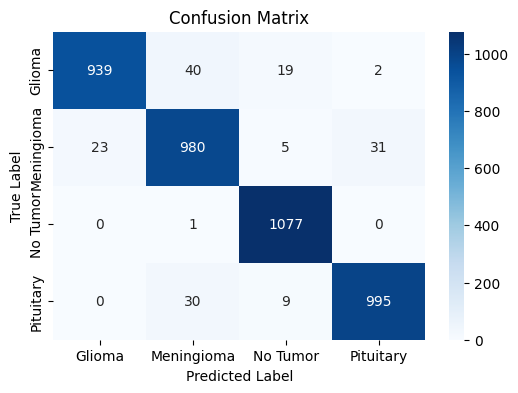

In [34]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model6.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
    

# Xception Model

In [35]:
conv_base=Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(299,299,3)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
model7=Sequential()
model7.add(conv_base)
model7.add(Flatten())
model7.add(Dense(224,activation='relu'))
model7.add(Dense(4,activation='softmax'))

In [39]:
conv_base.trainable= False

In [40]:
model7.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 224)                 │      45,875,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,737,804 (254.58 MB)

 Trainable params: 45,876,324 (175.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [41]:
# Generators
def generators():
  train_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Training',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  validation_ds = keras.utils.image_dataset_from_directory(
      directory='/kaggle/input/brain-mri-dataset/Project/Testing',
      labels="inferred",
      label_mode="categorical",
      color_mode="rgb",
      batch_size=32,
      image_size=(299, 299),
  )
  return train_ds,validation_ds

In [42]:
train_ds,validation_ds=generators()

Found 12449 files belonging to 4 classes.
Found 4151 files belonging to 4 classes.


In [43]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess

def preprocess_xception(image, label):
    image = xception_preprocess(tf.cast(image, tf.float32))
    return image, label

train_ds = train_ds.map(preprocess_xception)
validation_ds = validation_ds.map(preprocess_xception)


In [44]:
cp7 = ModelCheckpoint(
    "model7.keras",  
    monitor="val_accuracy",  
    save_best_only=True, 
    mode="max",  
    verbose=1  
)

In [45]:
initial_lr = 0.001
epochs = 30
steps_per_epoch = len(train_ds)

decay_steps = steps_per_epoch * epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=1e-6
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model7.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
history=model7.fit(train_ds, epochs=epochs, validation_data=validation_ds,callbacks=[cp7])

Epoch 1/30


2025-05-25 06:47:49.132669: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=0} for conv (f32[32,256,74,74]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,256,74,74]{3,2,1,0}, f32[256,256,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-05-25 06:47:49.229033: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.096472654s
Trying algorithm eng3{k11=0} for conv (f32[32,256,74,74]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,256,74,74]{3,2,1,0}, f32[256,256,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_

390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8208 - loss: 3.4691
Epoch 1: val_accuracy improved from -inf to 0.93423, saving model to model7.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 201s 455ms/step - accuracy: 0.8210 - loss: 3.4635 - val_accuracy: 0.9342 - val_loss: 0.2436
Epoch 2/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9662 - loss: 0.1273
Epoch 2: val_accuracy did not improve from 0.93423
390/390 ━━━━━━━━━━━━━━━━━━━━ 153s 394ms/step - accuracy: 0.9662 - loss: 0.1274 - val_accuracy: 0.9106 - val_loss: 0.3448
Epoch 3/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9785 - loss: 0.0686
Epoch 3: val_accuracy did not improve from 0.93423
390/390 ━━━━━━━━━━━━━━━━━━━━ 153s 393ms/step - accuracy: 0.9785 - loss: 0.0685 - val_accuracy: 0.9210 - val_loss: 0.3173
Epoch 4/30
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9843 - loss: 0.0444
Epoch 4: val_accuracy did not improve from 0.93423
390/390 ━━━━━━━━━━━━━━━━━━━━ 154s 396ms/step - accuracy: 0.98

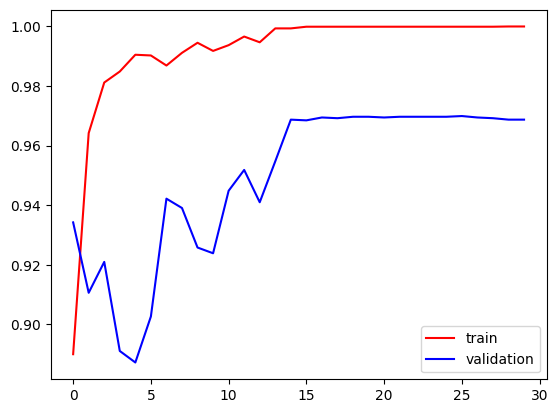

In [47]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

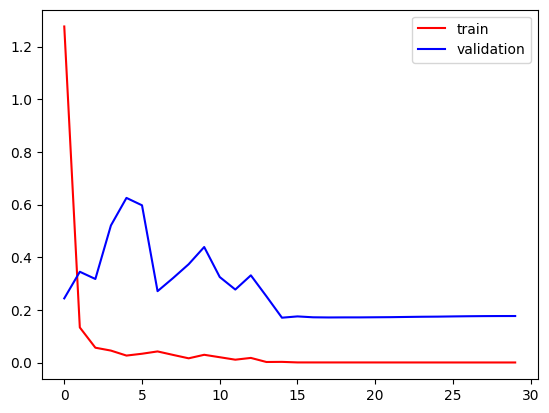

In [48]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

              precision    recall  f1-score   support

      Glioma       0.98      0.94      0.96      1000
  Meningioma       0.94      0.96      0.95      1039
    No Tumor       0.98      1.00      0.99      1078
   Pituitary       0.98      0.97      0.98      1034

    accuracy                           0.97      4151
   macro avg       0.97      0.97      0.97      4151
weighted avg       0.97      0.97      0.97      4151



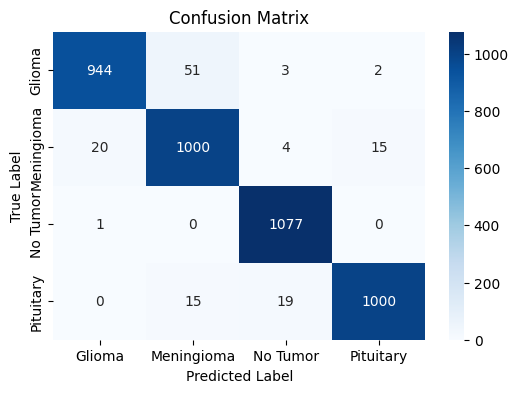

In [49]:
# Define class labels
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]


# Get true labels (y_true) and images
y_true = []
y_pred = []

for img, label in validation_ds.unbatch():  
    # Append true label (convert one-hot to class index if needed)
    if len(label.shape) > 1:  # If one-hot encoded
        y_true.append(np.argmax(label.numpy()))
    else:
        y_true.append(label.numpy())

    # Get model prediction
    img_expanded = tf.expand_dims(img, axis=0)  # Expand dimensions for single prediction
    pred_probs = model7.predict(img_expanded, verbose=0)  # Predict
    y_pred.append(np.argmax(pred_probs))  # Get class index

# Convert lists to numpy arrays
y_true1 = np.array(y_true)
y_pred = np.array(y_pred)
y_true=np.argmax(y_true, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
    